In [16]:
from ml_code.utils import load_data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


# Load the dataset
data = load_data("car_data.csv")

# Print the first few rows of the dataset
data.head()

,model,horsepower,fuel_efficiency,weight,price
0,SportsCar1,450,12,3500,150000
1,SportsCar2,500,10,3800,200000
2,SportsCar3,400,14,3200,120000
3,SportsCar4,480,11,3600,180000
4,SportsCar5,420,13,3400,140000


In [17]:
# Separate the features and the target variable
X = data.drop("model", axis=1)
y = data["model"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

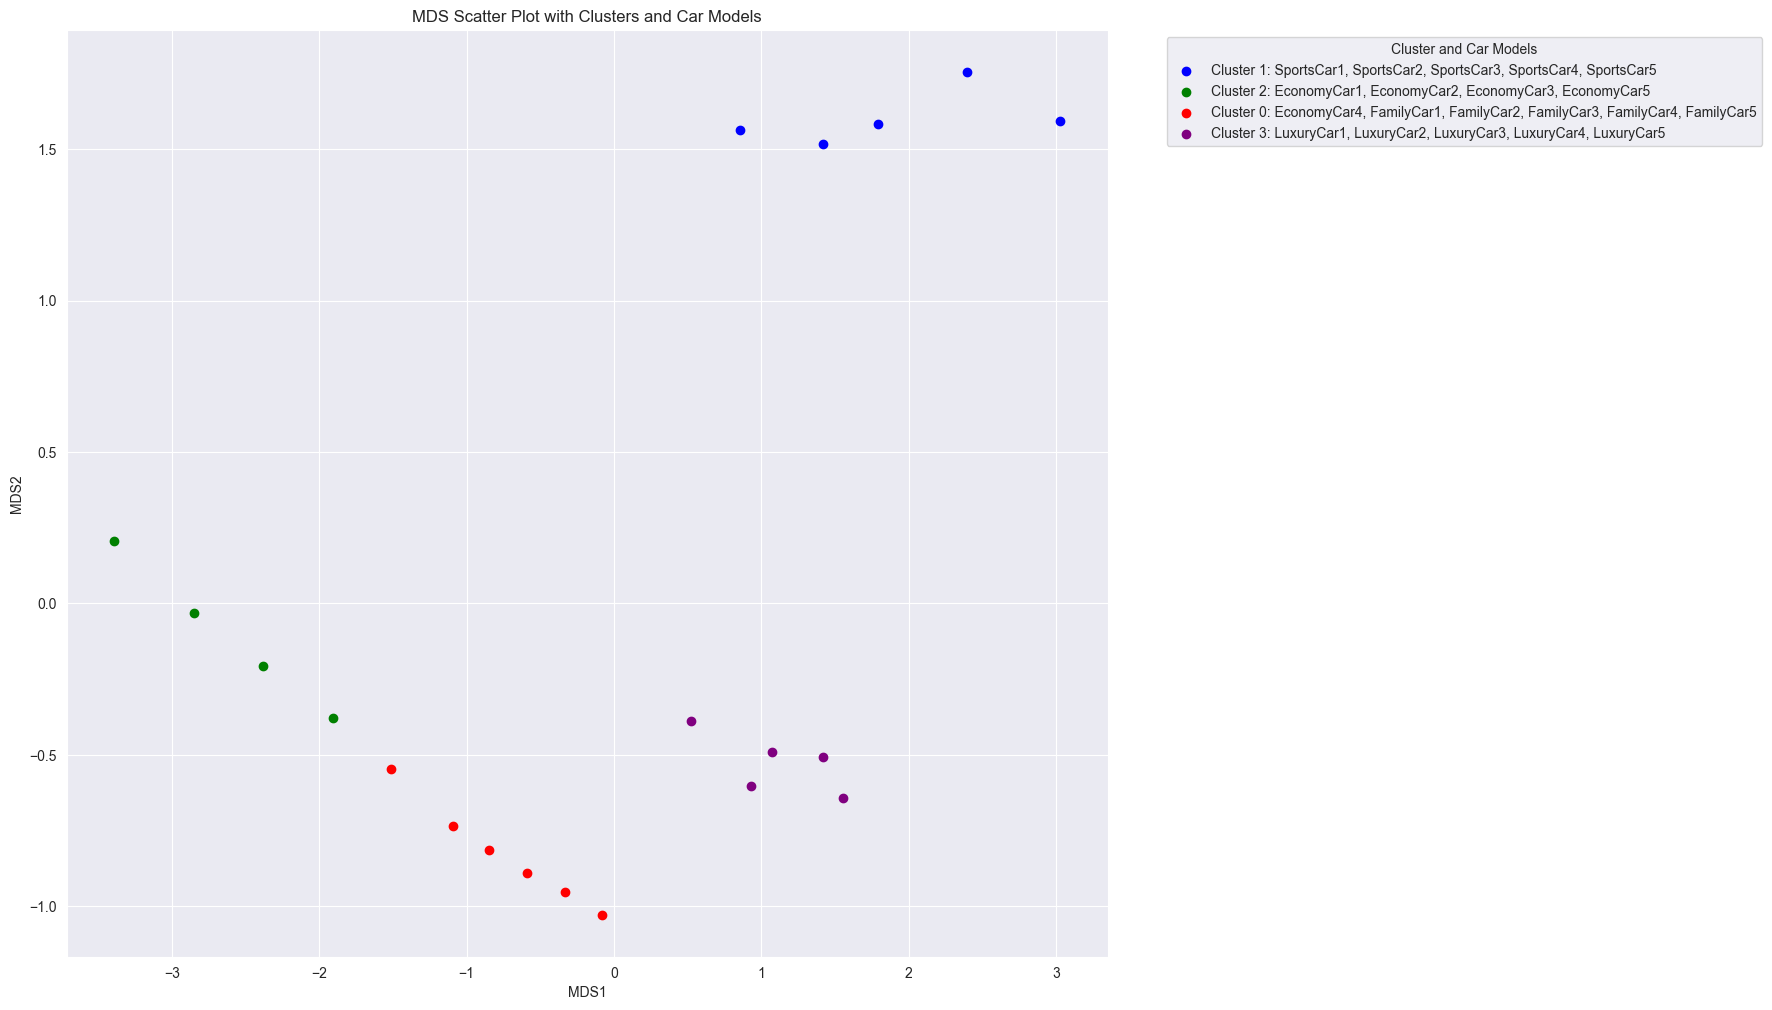

In [18]:
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

# Apply MDS with Euclidean distance
mds_euclidean = MDS(n_components=2, dissimilarity="euclidean", random_state=42)
X_mds_euclidean = mds_euclidean.fit_transform(X_scaled)

# Create DataFrames for MDS results
mds_euclidean_df = pd.DataFrame(data=X_mds_euclidean, columns=["MDS1", "MDS2"])
mds_euclidean_df["Model"] = y

# Plot the MDS scatter plots
kmeans = KMeans(n_clusters=4, random_state=42)
mds_euclidean_df["Cluster"] = kmeans.fit_predict(mds_euclidean_df[["MDS1", "MDS2"]])

# Create a dictionary to map cluster labels to car model names
cluster_models = {}
for cluster in mds_euclidean_df["Cluster"].unique():
    models = mds_euclidean_df[mds_euclidean_df["Cluster"] == cluster]["Model"].unique()
    cluster_models[cluster] = ", ".join(models)

# Plot the MDS scatter plot with car model labels and cluster rings
plt.figure(figsize=(18, 10))
colors = ["red", "blue", "green", "purple"]
for cluster in mds_euclidean_df["Cluster"].unique():
    subset = mds_euclidean_df[mds_euclidean_df["Cluster"] == cluster]
    plt.scatter(
        subset["MDS1"],
        subset["MDS2"],
        c=colors[cluster],
        label=f"Cluster {cluster}: {cluster_models[cluster]}",
    )

    center = subset[["MDS1", "MDS2"]].mean()


plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="Cluster and Car Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.title("MDS Scatter Plot with Clusters and Car Models")
plt.show()

In [27]:
import numpy as np


def log_fold_change_distance(x, y):
    x = x + 1e-6  # Add a small constant to avoid division by zero
    y = y + 1e-6
    return np.mean(np.abs(np.log2(x / y)))

In [35]:
# Load the dataset
data = load_data("car_data.csv")

# Print the first few rows of the dataset
data.head()

# Separate the features and the target variable
X = data.drop("model", axis=1)
y = data["model"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

# Compute the distance matrix using log fold change distance
log_fold_dist_matrix = squareform(pdist(X, metric=log_fold_change_distance))

# Apply MDS with log fold change distance
mds_log_fold = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
X_mds_log_fold = mds_log_fold.fit_transform(log_fold_dist_matrix)

# Create DataFrame for MDS results
mds_log_fold_df = pd.DataFrame(data=X_mds_log_fold, columns=["MDS1", "MDS2"])
mds_log_fold_df["Model"] = y

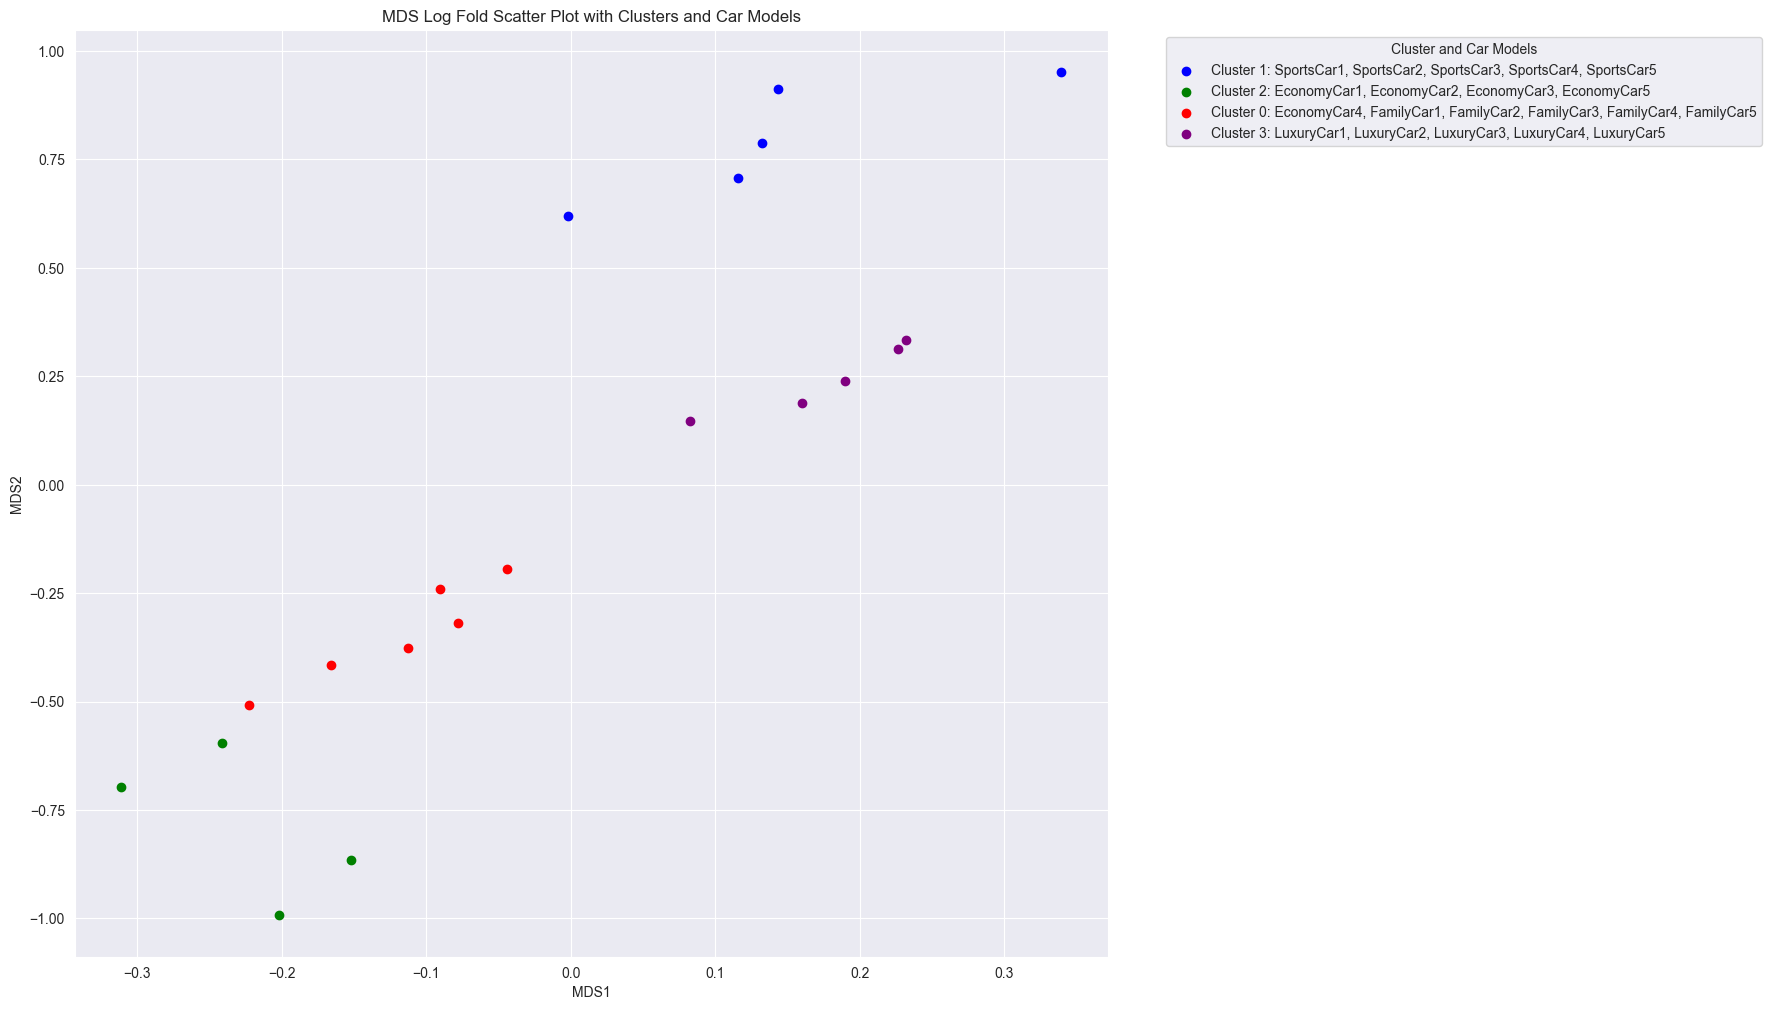

In [41]:
# Plot the MDS scatter plots
kmeans = KMeans(n_clusters=4, random_state=42)
mds_log_fold_df["Cluster"] = kmeans.fit_predict(mds_euclidean_df[["MDS1", "MDS2"]])

# Create a dictionary to map cluster labels to car model names
cluster_models = {}
for cluster in mds_log_fold_df["Cluster"].unique():
    models = mds_log_fold_df[mds_log_fold_df["Cluster"] == cluster]["Model"].unique()
    cluster_models[cluster] = ", ".join(models)

# Plot the MDS scatter plot with car model labels and cluster rings
plt.figure(figsize=(18, 10))
colors = ["red", "blue", "green", "purple"]
for cluster in mds_log_fold_df["Cluster"].unique():
    subset = mds_log_fold_df[mds_log_fold_df["Cluster"] == cluster]
    plt.scatter(
        subset["MDS1"],
        subset["MDS2"],
        c=colors[cluster],
        label=f"Cluster {cluster}: {cluster_models[cluster]}",
    )

    center = subset[["MDS1", "MDS2"]].mean()


plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="Cluster and Car Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.title("MDS Log Fold Scatter Plot with Clusters and Car Models")
plt.show()